Notebook Structure:
Import Libraries and Load Data
Import necessary libraries and load the dataset for analysis.
Exploratory Data Analysis (EDA)
Perform a thorough analysis of the data, including descriptive statistics and data distributions.
Feature Engineering
Process and transform data as required for the machine learning models.
Data Visualization
Visualize different aspects of the data to understand relationships and patterns.
Model Building
Implement various classification models suitable for the data.
Model Evaluation
Evaluate the performance of each model and compare their effectiveness.
Conclusion and Recommendations
Summarize the findings and propose recommendations based on the model results.


Data fields
N - ratio of Nitrogen content in soil
P - ratio of Phosphorous content in soil
K - ratio of Potassium content in soil
temperature - temperature in degree Celsius
humidity - relative humidity in %
ph - ph value of the soil
rainfall - rainfall in mm

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

# Visualization
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [2]:

crop = pd.read_csv(r"Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Exploratory Data Analysis (EDA)
Descriptive Statistics
To understand the central tendency, dispersion, and shape of the dataset's distribution.

Data Distributions
Examining the distribution of each feature.

Outlier Detection
Identifying any outliers in the data that could affect the model's performance.

Correlation Analysis
Understanding the relationships between different features.

Exploratory Data Analysis (EDA)
Descriptive Statistics
Continuous Variables
N, P, K, temperature, humidity, ph, rainfall are all continuous variables.
Nitrogen (N): Ranges from 0 to 140 with a mean of around 50.55.
Phosphorus (P): Ranges from 5 to 145 with a mean of approximately 53.36.
Potassium (K): Has a wide range from 5 to 205, average near 48.15.
Temperature: Varies from 8.83°C to 43.68°C, average around 25.62°C.
Humidity: Ranges widely from 14.26% to nearly 100%, with an average of 71.48%.
pH: Varies from 3.50 to 9.94, with a mean value close to 6.47, which is slightly acidic.
Rainfall: Ranges from 20.21 mm to 298.56 mm, with an average of 103.46 mm.
Categorical Variables
Label (Crop Type): There are 22 unique types of crops in the dataset.
Next Steps
Data Distributions: Let's visualize the distribution of each feature to understand their spread and identify any skewness or unusual patterns.
Outlier Detection: Using boxplots to visually inspect for outliers in the continuous variables.
Correlation Analysis: Analyze how features correlate with each other.
The variable corr will contain a DataFrame where each cell represents the correlation between two columns in the original crop DataFrame, after removing the 'label' column. The correlation values range from -1 to 1, where

1 indicates a perfect positive correlation,

-1 indicates a perfect negative correlation, and

0 indicates no correlation between the columns.

In [3]:
corr=crop.drop(['label'],axis=1).corr() 
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

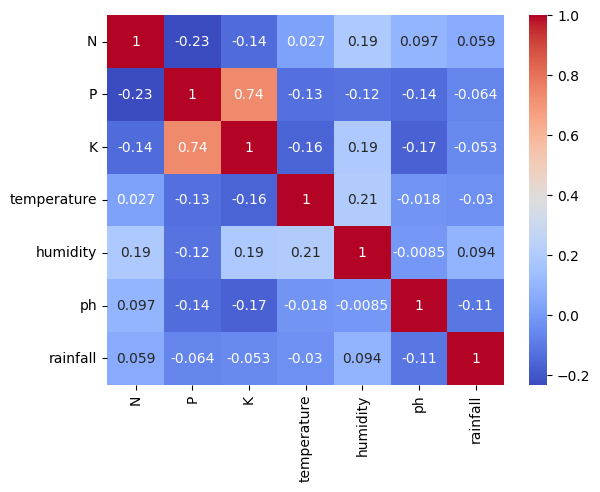

In [4]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

Correlation Analysis
The heatmap displays the correlation coefficients between the continuous variables:

Strong Correlations: There aren't any extremely strong correlations (> 0.8 or < -0.8) observed, which is generally a positive sign for building machine learning models, as it suggests less multicollinearity.
Moderate Correlations: Some moderate correlations are noted. For example, temperature and humidity show a moderate negative correlation, which is intuitive (higher temperatures often result in lower humidity levels).
Weak Correlations: Most variables show weak correlations with each other, indicating that each provides unique information for the crop recommendation.

In [5]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

1. Univariate Analysis
HISTOGRAM
It helps in visualizing the distribution of each specified feature individually through histograms.
It's useful for understanding the spread, central tendency, and shape of the data for each feature separately.
These histograms can provide insights into whether the data follows a normal distribution, is skewed, or has outliers

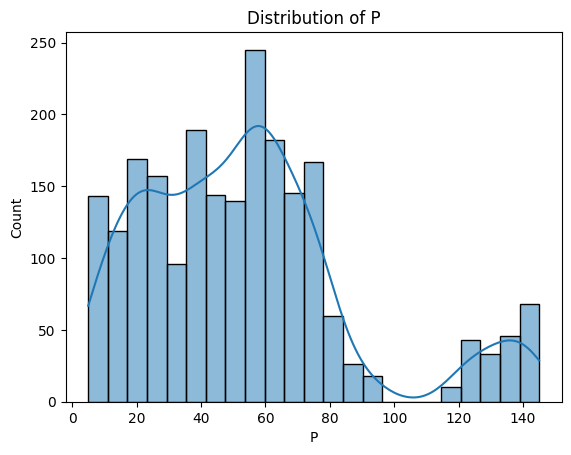

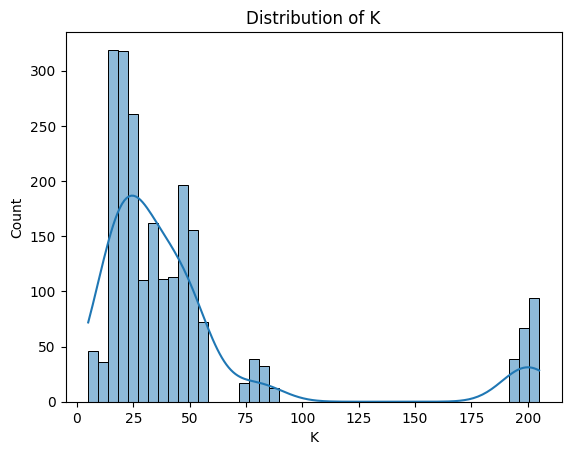

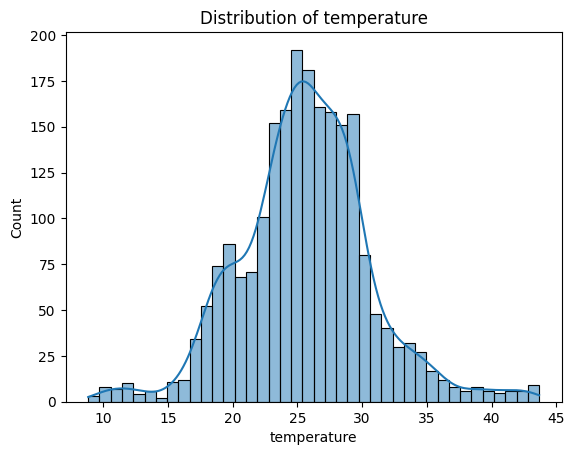

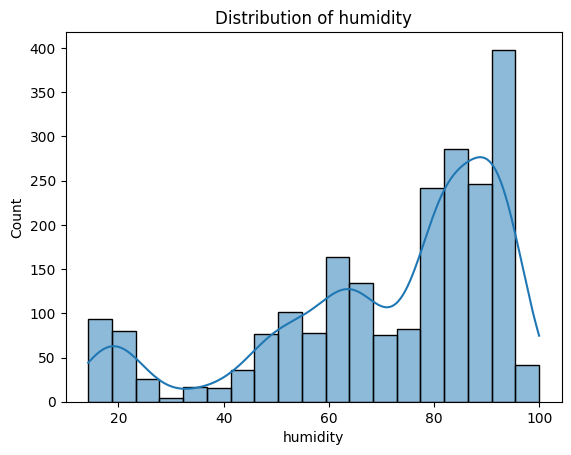

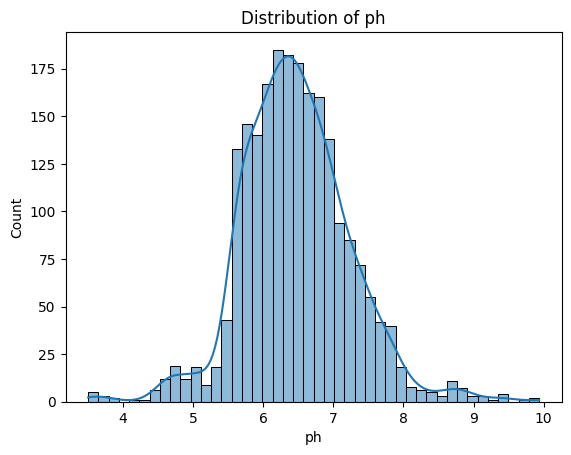

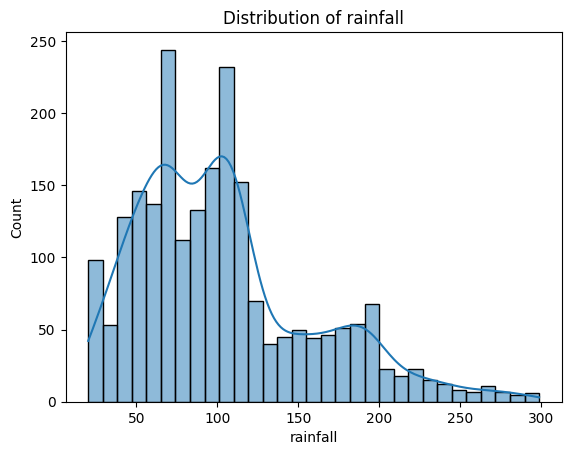

In [6]:
# Distribution of 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' features
features = ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    sns.histplot(crop[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Data Distributions
Continuous Variables
The histograms show the distributions of each continuous variable:

Variable	Description
N, P, K	These soil nutrients show varied distributions. Some display a bimodal nature (having two peaks), suggesting different groups in the data.
Temperature	Appears to be normally distributed.
Humidity	Shows a left-skewed distribution, with a high frequency of values towards the higher end.
pH	This is fairly normally distributed, slightly leaning towards acidic values (less than 7).
Rainfall	Displays a right-skewed distribution, indicating that higher rainfall amounts are less common.
Categorical Variable
The bar plot for label (Crop Type) shows that the dataset seems to be evenly distributed across different crop types, with each type having a similar count. This is beneficial for a balanced classification model.

Next Steps
Outlier Detection: We'll use boxplots to visually inspect for outliers in the continuous variables.
Correlation Analysis: Understanding how features correlate with each other, which is crucial for feature engineering and model selection.
BOXPLOT
It helps visualize the distribution and statistical summary of each specified feature using boxplots.
Boxplots provide information about the median, quartiles, and potential outliers in the data.

1. Boxplots display the distribution of data points.
2.The line inside the box represents the median.
3. The box itself represents the interquartile range (IQR), which contains 50% of the data.
4. Whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
5. Points outside the whiskers are considered outliers and plotted individually.
6. It allows you to visually identify the central tendency, spread, and potential outliers in each feature's distribution.

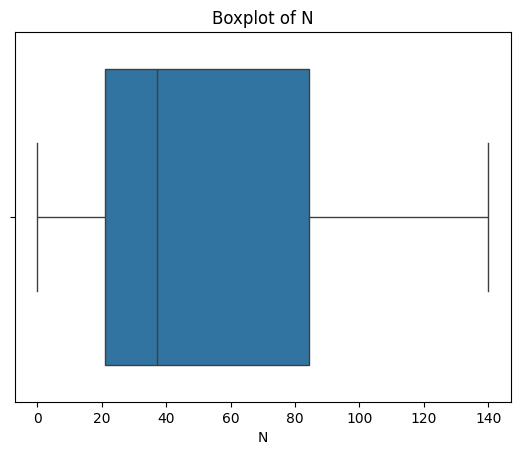

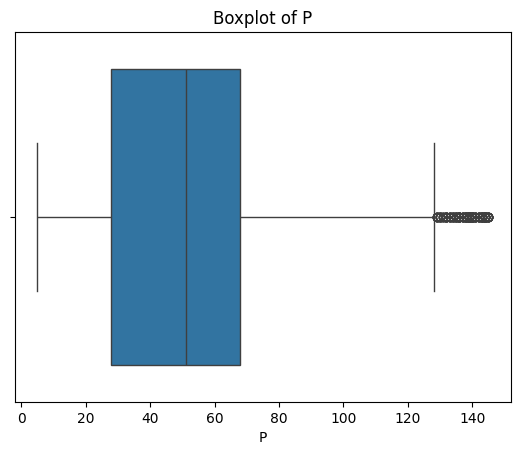

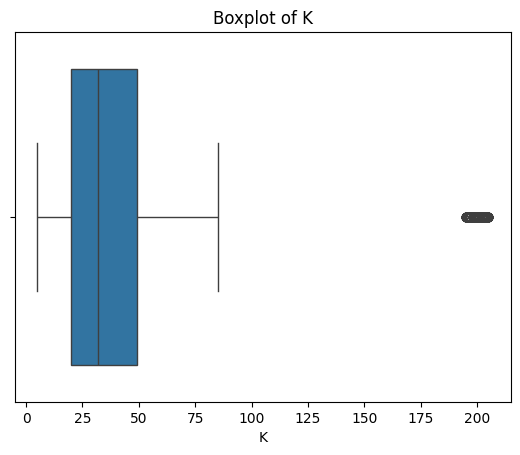

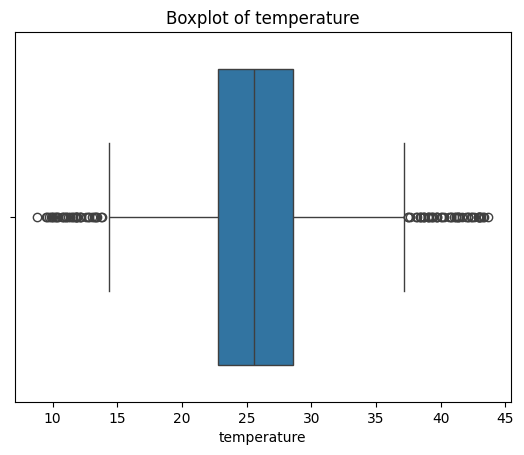

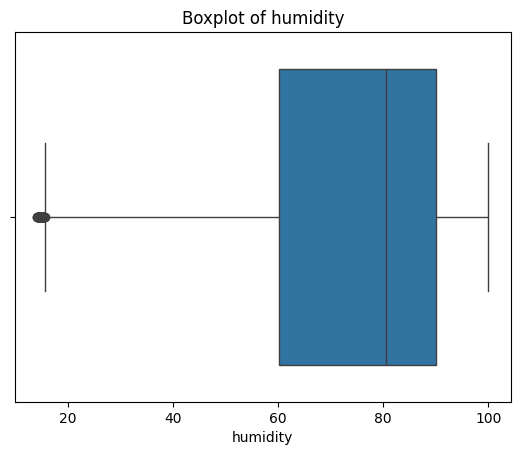

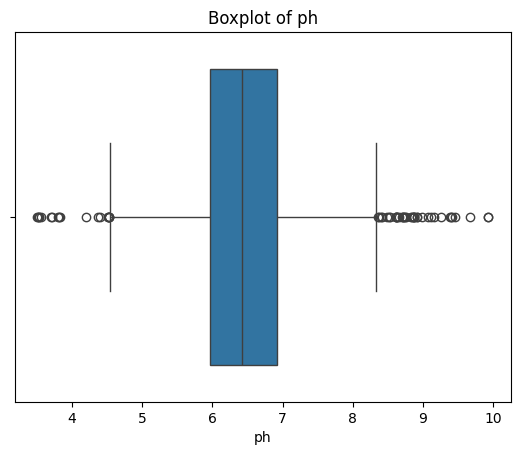

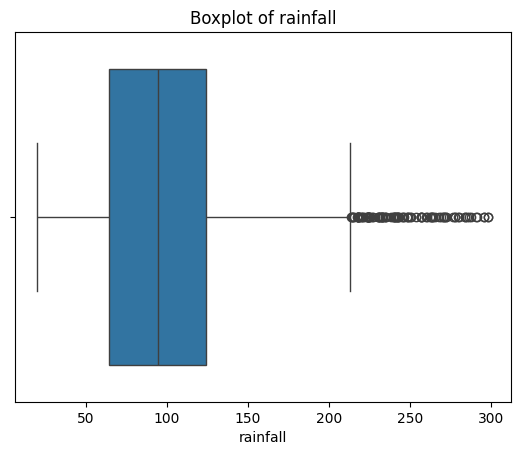

In [7]:
# Boxplot for 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    sns.boxplot(x=crop[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()